## read the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data = pd.read_csv('drive/MyDrive/test/Olympic Analysis/athlete_events.csv')

In [4]:
df = Data.copy()

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
df.info()
print('----------------------------------')
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
----------------------------------


<bound method NDFrame.describe of             ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Sum

# Work with Data (Arab countries)

In [7]:
# check missing value in each columns 
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [8]:
df['Team'].nunique()

1184

In [9]:
arabs = 'Algeria, Bahrain, Comoros, Djibouti, Egypt, Iraq, Jordan, Kuwait, Lebanon, Libya, Mauritania, Morocco, Oman, Palestine, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, United Arab Emirates, Yemen'
arabs_list = arabs.split(', ')
arabs_list

['Algeria',
 'Bahrain',
 'Comoros',
 'Djibouti',
 'Egypt',
 'Iraq',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Libya',
 'Mauritania',
 'Morocco',
 'Oman',
 'Palestine',
 'Qatar',
 'Saudi Arabia',
 'Somalia',
 'Sudan',
 'Syria',
 'Tunisia',
 'United Arab Emirates',
 'Yemen']

In [10]:
arab_country = df[df['Team'].isin(arabs_list)]
arab_country['Team'].unique()

array(['Morocco', 'Egypt', 'Sudan', 'Algeria', 'Kuwait', 'Bahrain',
       'Iraq', 'Lebanon', 'Qatar', 'Jordan', 'Tunisia', 'Libya',
       'Djibouti', 'Palestine', 'Comoros', 'Saudi Arabia', 'Syria',
       'United Arab Emirates', 'Somalia', 'Mauritania', 'Yemen', 'Oman'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


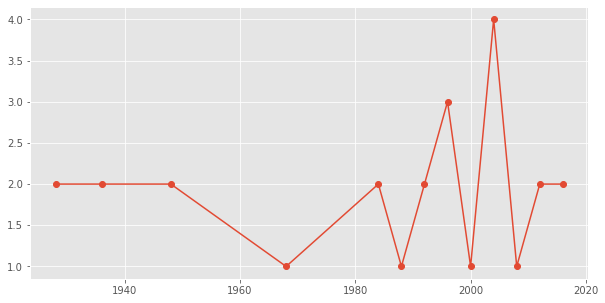

In [11]:
gold_medal_ar = arab_country[df['Medal'] == 'Gold'].groupby("Year")['Medal'].count().sort_index()

plt.figure(figsize =(10,5))
plt.style.use("ggplot")
plt.plot(gold_medal_ar.index, gold_medal_ar.values,marker = 'o')
plt.show()

In [12]:
gold_medal_ar = arab_country[df['Medal'] == 'Gold'].groupby("Team")['Medal'].count().sort_values(ascending= False)
gold_medal_ar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Team
Egypt                   7
Morocco                 6
Algeria                 5
Tunisia                 3
Bahrain                 1
Jordan                  1
Syria                   1
United Arab Emirates    1
Name: Medal, dtype: int64

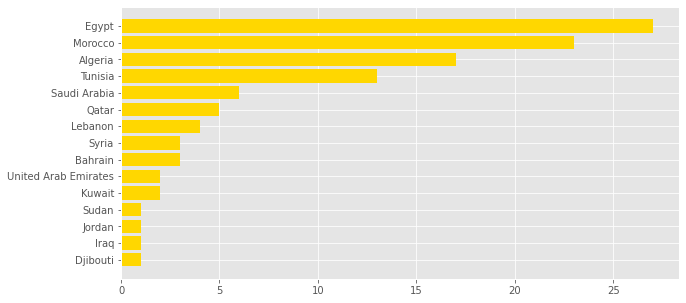

In [13]:
arab_medals = arab_country[~arab_country['Medal'].isna()].groupby("Team")['Medal'].count().sort_values()

plt.figure(figsize =(10,5))
plt.barh(arab_medals.index, arab_medals.values, color = '#FFD700')

plt.show()

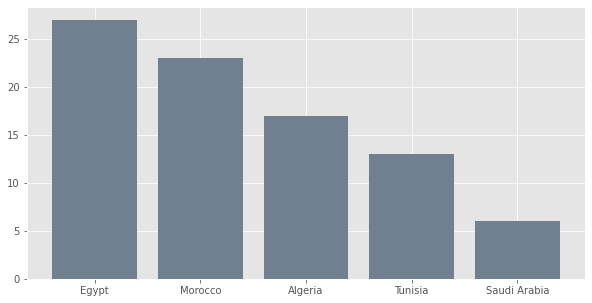

In [14]:
# Top 5
arab_medals = arab_country[~arab_country['Medal'].isna()].groupby("Team")['Medal'].count().sort_values(ascending = False).head()

plt.figure(figsize =(10,5))
colors = arab_medals.values
plt.bar(arab_medals.index, arab_medals.values,color = '#708090')

plt.show()

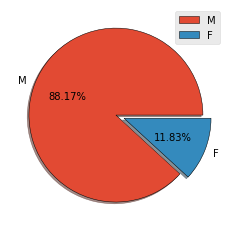

In [15]:
sex_ar = arab_country['Sex'].value_counts()


labels = sex_ar.index
plt.pie(sex_ar, labels = labels,shadow=True,wedgeprops={'edgecolor':'black'},explode=[0,0.1],autopct='%1.2f%%')
plt.legend()
plt.show()

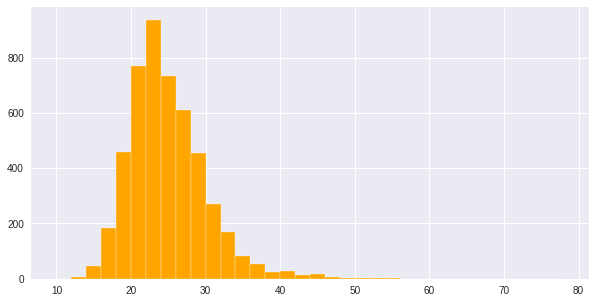

In [16]:
arab_age = arab_country['Age']

plt.style.use('seaborn')
plt.figure(figsize =(10,5))
plt.hist(arab_age, bins = np.arange(10,80,2), color = 'orange',edgecolor = 'white')
plt.show()

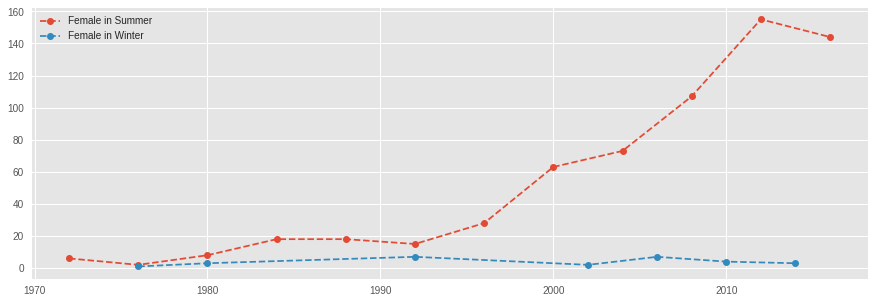

In [17]:
f_arab_s = arab_country[(arab_country['Sex'] =='F') & (arab_country['Season'] =='Summer')]['Year'].value_counts().sort_index()
f_arab_w = arab_country[(arab_country['Sex'] =='F') & (arab_country['Season'] =='Winter')]['Year'].value_counts().sort_index()


plt.style.use('ggplot')
plt.figure(figsize =(15,5))
plt.style.use("ggplot")

plt.plot(f_arab_s.index, f_arab_s.values,'--',marker = 'o',label = 'Female in Summer')
plt.plot(f_arab_w.index, f_arab_w.values,'--',marker = 'o',label =  'Female in Winter')
plt.legend()

plt.show()

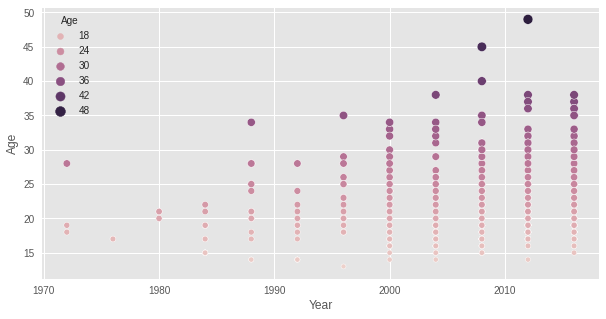

In [18]:
f_arab_s = arab_country[(arab_country['Sex'] =='F') & (arab_country['Season'] =='Summer')]


plt.figure(figsize =(10,5))
sns.scatterplot(data =f_arab_s, x = 'Year',y = 'Age', hue ='Age',size = 'Age')

# Work with Data (all)

In [19]:
# Which country has participated in the Olympics the most ?
df['City'].value_counts().head(1)

London    22426
Name: City, dtype: int64

In [20]:
# Number of athelte each year
num_players = df.groupby('Year')['ID'].nunique()
num_players

Year
1896      176
1900     1224
1904      650
1906      841
1908     2024
1912     2409
1920     2676
1924     3565
1928     3703
1932     2174
1936     5142
1948     5068
1952     5622
1956     4167
1960     6017
1964     6230
1968     6717
1972     8122
1976     7200
1980     6330
1984     8067
1988     9873
1992    11183
1994     1738
1996    10339
1998     2179
2000    10647
2002     2399
2004    10557
2006     2494
2008    10899
2010     2536
2012    10517
2014     2745
2016    11179
Name: ID, dtype: int64

<BarContainer object of 42 artists>

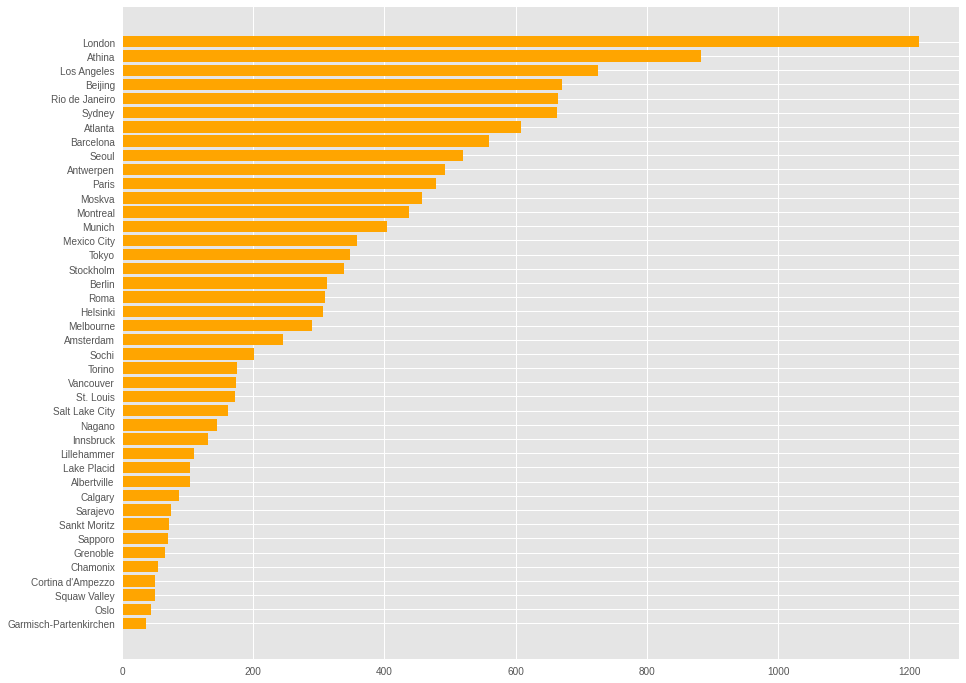

In [21]:
# Ranking of countries in terms of gold medals
gold_medal = df[df['Medal']=='Gold'].groupby("City")['Medal'].count().sort_values(ascending=True)


plt.figure(figsize =(15,12))
plt.barh(gold_medal.index, gold_medal.values, color = 'orange')

<BarContainer object of 5 artists>

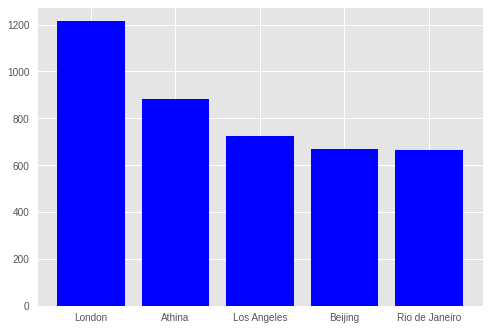

In [22]:
# top 5 coutries 
top_5_gold = gold_medal.nlargest().sort_values(ascending = False)

plt.bar(top_5_gold.index, top_5_gold.values, color = 'blue')

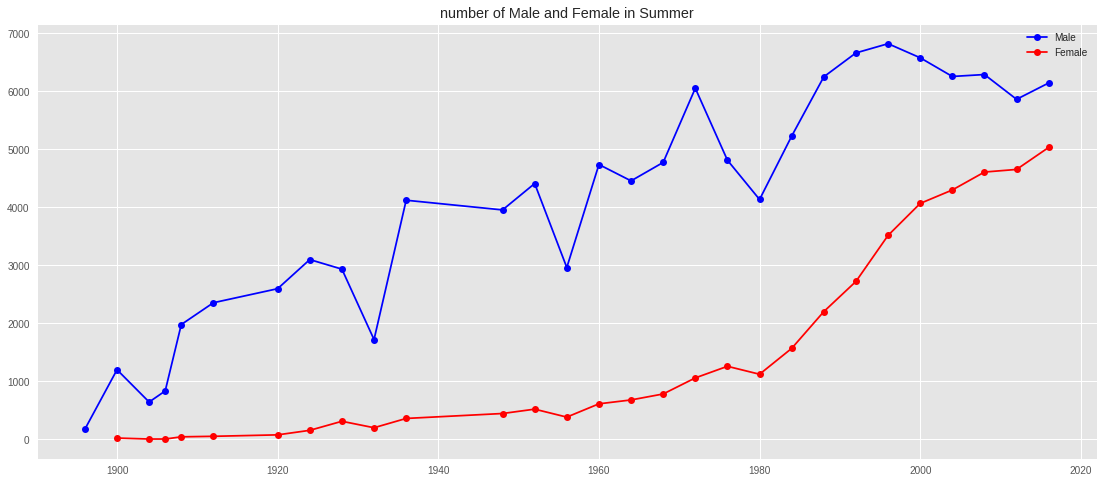

In [71]:
# number of Male and Female (in Summer)
num_m_s = df[(df['Sex']=='M') & (df['Season']=='Summer')].groupby("Year")['ID'].nunique()
num_f_s = df[(df['Sex']=='F') & (df['Season']=='Summer')].groupby("Year")['ID'].nunique()



plt.figure(figsize =(19,8))
plt.title('number of Male and Female in Summer')
plt.plot(num_m_s.index,num_m_s.values,color = 'b', label = 'Male', marker='o')
plt.plot(num_f_s.index,num_f_s.values,color = 'r',label = 'Female', marker='o')
plt.legend()

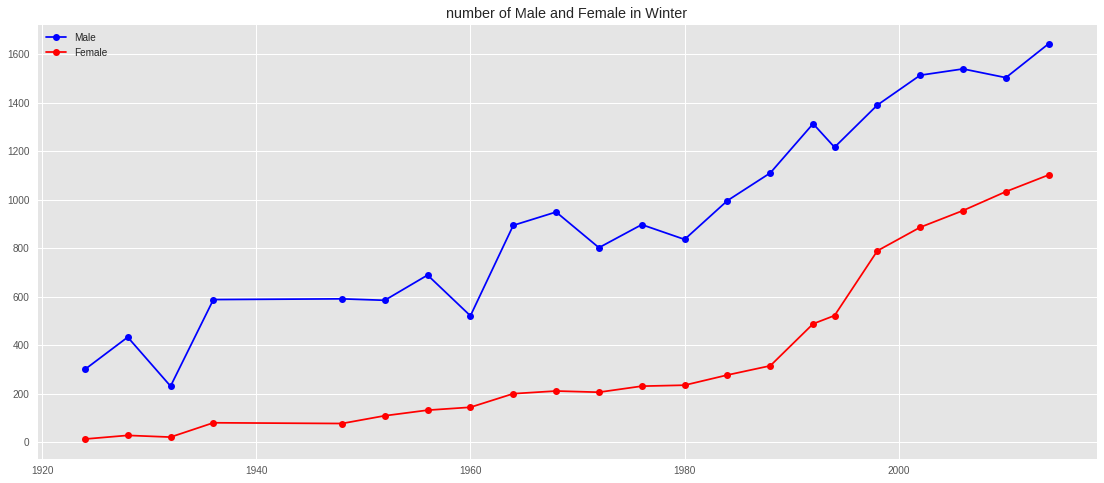

In [72]:
# number of Male and Female (in Winter)
num_m_w = df[(df['Sex']=='M') & (df['Season']=='Winter')].groupby("Year")['ID'].nunique()
num_f_w = df[(df['Sex']=='F') & (df['Season']=='Winter')].groupby("Year")['ID'].nunique()



plt.figure(figsize =(19,8))
plt.title('number of Male and Female in Winter')
plt.plot(num_m_w.index,num_m_w.values,color = 'b', label = 'Male', marker='o')
plt.plot(num_f_w.index,num_f_w.values,color = 'r',label = 'Female', marker='o')
plt.legend()

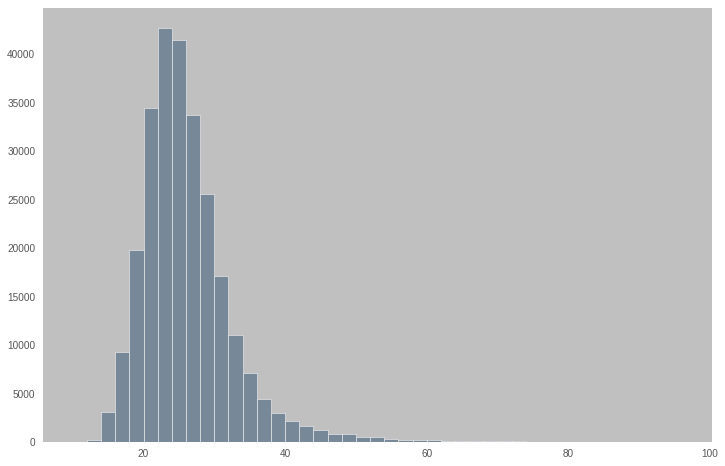

In [120]:
# Age
age_athelte = df['Age']
age_max = max(age_athelte.values)


plt.figure(figsize = (12,8))
bins = np.arange(10, age_max +1, 2)
ax=plt.axes()
ax.set_facecolor('#C0C0C0')
plt.grid(None)
plt.hist(age_athelte, bins= bins, edgecolor = 'white', color = '#778899')

plt.show()

In [156]:
# The player with the most medals
id = df.groupby('ID')['Medal'].count().sort_values(ascending=False).head(1)
id = id.index[0]
player = df[df['ID'] == id]

player.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
187887,94406,"Michael Fred Phelps, II",M,15.0,193.0,91.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NaN


In [177]:
# The player with the most gold medal 
ID = df[df['Medal'] == 'Gold'].groupby('ID')['Medal'].count().sort_values(ascending=False).head(1)
ID = ID.index[0]

player_gold = df[(df['ID'] == ID) & (df['Medal']=='Gold')]
player_gold.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
187890,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold


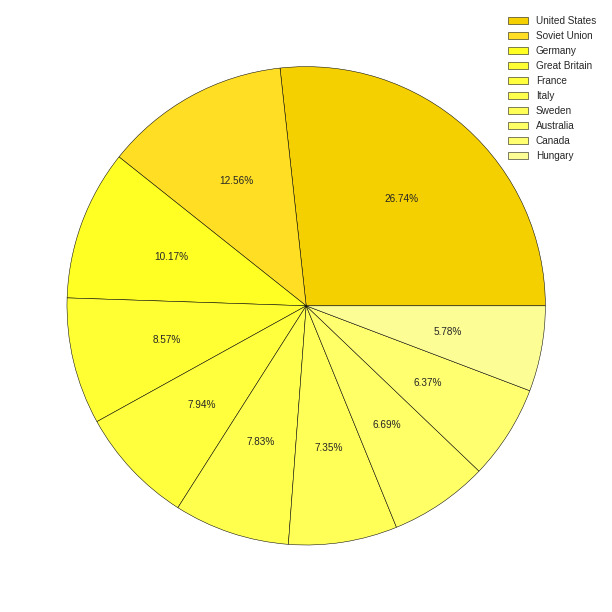

In [208]:
team_medal_10= df.groupby('Team')['Medal'].count().sort_values(ascending=False).head(10)


plt.figure(figsize = (17,11))

color = ['#f5d000','#ffde24','#ffff24','#ffff33','#ffff3d','#ffff4d','#ffff57','#ffff66','#ffff70','#fdfd96']
plt.pie(team_medal_10,wedgeprops={'edgecolor':'black'},autopct='%1.2f%%', colors = color)
plt.legend(team_medal_10.index)
plt.show()